#    一、我感兴趣的一些问题

##        什么因素能影响船上人的生还率？
###        1.生还者与未生还者的年龄分布情况
###        2.船票等级对生还率的影响
###        3.生还者与未生还者的性别差异

#    二、数据处理

In [25]:
import numpy as np
import pandas as pd

In [26]:
#读取样本数据
titanic = pd.read_csv('titanic-data.csv')

In [27]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
#查看原数据是否存在缺失值
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [29]:
#对age做缺失值处理,去掉缺失值所在的行
titanic_age = titanic[['PassengerId', 'Survived', 'Age']].dropna()

In [30]:
#给titanic_age增加新列grouped_age，将age列分组标记
for index in titanic_age.index:
    if titanic_age.loc[index, 'Age'] <= 10:
        titanic_age.loc[index, 'grouped_age'] = '(0,10]'
    elif titanic_age.loc[index, 'Age'] <= 20:
        titanic_age.loc[index,'grouped_age'] = '(10,20]'
    elif titanic_age.loc[index, 'Age'] <= 30:
        titanic_age.loc[index, 'grouped_age'] = '(20,30]'
    elif titanic_age.loc[index, 'Age'] <= 40:
        titanic_age.loc[index, 'grouped_age'] = '(30,40]' 
    elif titanic_age.loc[index, 'Age'] <= 50:
        titanic_age.loc[index, 'grouped_age'] = '(40,50]'
    elif titanic_age.loc[index, 'Age'] <= 60:
        titanic_age.loc[index, 'grouped_age'] = '(50,60]'
    elif titanic_age.loc[index, 'Age'] <= 70:
        titanic_age.loc[index, 'grouped_age'] = '(60,70]'
    else:
        titanic_age.loc[index, 'grouped_age'] = '(70,80]'


#    三、数据分析

##    1.探究年龄能否影响泰坦尼克号生还情况

In [31]:
#展示生还者的年龄描述统计(忽略空值)
survived_age = titanic_age[titanic_age.Survived == 1]['Age']
survived_age.describe()

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [32]:
#展示未生还者的年龄描述统计（忽略空值）
unsurvived_age = titanic_age[titanic_age['Survived'] == 0]['Age']
unsurvived_age.describe()

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64

Populating the interactive namespace from numpy and matplotlib


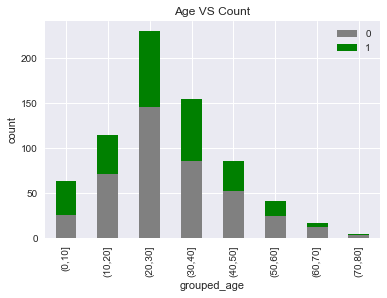

In [33]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
#可视化不同年龄段生还者和未生还者数量
unsurvived_data = titanic_age.groupby(['Survived', 'grouped_age'])['PassengerId'].count().loc[0]
survived_data = titanic_age.groupby(['Survived', 'grouped_age'])['PassengerId'].count().loc[1]
unsurvived_data.plot(kind = 'bar',label = '0', fc = 'gray')
survived_data.plot(kind = 'bar',bottom = unsurvived_data, label = '1', fc = 'g')
plt.legend()
plt.title('Age VS Count')
plt.ylabel('count')

### 结论1: 未生还者相对生还者平均年龄更大,从年龄分组来看，0～10岁小孩的生还率最高，体现了救援过程中的人道主义精神。

##    2.探究船票与生还率的关系

### 单变量分析：探究不同Pclass乘客占比

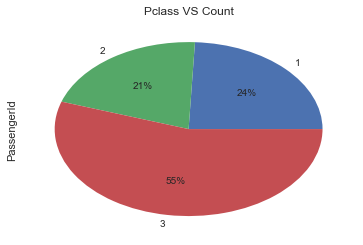

In [34]:
#建立一个函数来可视化不同类型乘客的占比
def plot_ratio(feature):
    titanic.groupby(feature)['PassengerId'].count().plot(kind = 'pie',autopct = '%.0f%%')
    plt.title(feature + ' VS Count')
    
#调取函数画不同船票等级的乘客的占比饼图
plot_ratio('Pclass')

### 样本总数为891位，饼图中显示下等舱的乘客数量最大，比头等舱和中等舱的总和还要多。

### 双变量分析：探究不同船票等级对生还率的影响

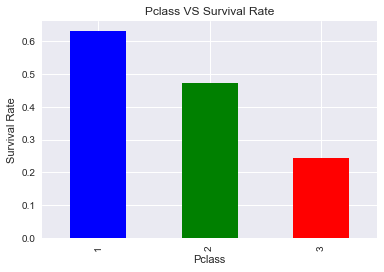

In [35]:
#建立一个函数来可视化不同变量的生还率
def plot_rate(feature):
    titanic.groupby(feature)['Survived'].mean().plot(kind = 'bar', color = 'bgr')
    plt.title(feature + ' VS Survival Rate')
    plt.ylabel('Survival Rate')
    
#调取函数画不同船票等级的生还率的柱形图
plot_rate('Pclass')

### 结论2: 船票对生还率有影响，未生还者更多是下等舱的旅客，船票等级越高，生还率越高。

##    3.探究性别与生还率的关系

### 单变量分析：探究不同性别的乘客占比

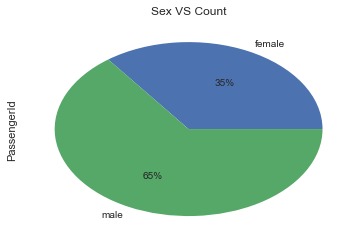

In [36]:
#调取函数画不同性别乘客占比的饼图
plot_ratio('Sex')

### 双变量分析：探究不同性别对生还率的影响

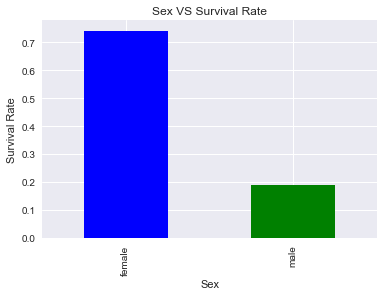

In [37]:
#调取函数画不同性别的生还率的柱形图
plot_rate('Sex')

### 结论3: 性别对生还率影响很大，女性生还率远高于男性，救援过程中充分体现了女士优先的美德。

#   四、结论：
###       1.通过上述分析，年龄、船票种类、性别和生还率均有一定的相关性，但是生还率还可能受其他因素影响，比如：健康状况、游泳技能等，这些影响因素都需要更多数据进一步研究。
###       2.该项目中所分析891位乘客数据仅仅是样本大小，不能保证其分布情况与总体完全吻合，可能会有一些偏差，但由于样本量较大，偏差相对较小，结论可以作为参考。
###       3.在样本的处理过程中，去掉年龄缺失行也可能会造成分析结果有一定偏差，增加不确定性，这点我们心里要有数。